## Препроцессинг и определение языка / Preprocessing and language detection

Предыдущая часть была посвящена предобработке текстовых данных, теперь применим эти методы на практике и заодно узнаем, как можно решать задачу определения языка.

**Идеи?**

Нам понадобятся некоторые пакеты для Питона, установите себе недостающие:
* wikipedia
* nltk

In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=13882319424d0ce3e8773073111209142399ceb0c23634eeac8f4e5ef4657b7f
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
!pip install nltk

In [3]:
from collections import Counter  # нужно объяснять, что это?

import nltk
import wikipedia

Возможно, перед первым запуском `nltk` нужно скачать немного данных:

In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Теперь посмотрим, как можно скачивать тексты из Википедии с помощью пакета `wikipedia`.

Поскольку мы будем выбирать из нескольких языков, лучше сразу завести функцию, которая будет 
скачивать нужное количество страниц для заданного языка.

In [5]:
TEST_LANGS = ('es', 'it', 'kk', 'ru', 'uk', 'be')

In [6]:
def get_texts_for_lang(lang, n=10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

In [7]:
wiki_texts = {}
for lang in TEST_LANGS:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Sorbo
Skip Crowder
es 48
Skip GCP
it 49
kk 50
Skip Малагола
Skip Коскинен
Skip Тызыл
Skip Список хокимов
ru 46
Skip Сандікрік Тауншип (округ Венанго, Пенсильванія)
Skip Митрофанов
uk 48
Skip Дыярбакыр (значэнні)
Skip Валынцы
Skip Шубін
be 47


1. Почему в данном случае мы можем не париться, что у нас разное число статей?

2. Что такое трай-эксепт? В каких случаях его можно использовать?
(логическте ошибки vs программные исключения)

3. Какие еще костыли/частые ошибки в коде вы знаете?

In [8]:
print(wiki_texts['kk'][0])
print(wiki_texts['it'][0])

Теней (Алье)
Теней (фр. Theneuille) — Франциядағы коммуна. Овернь аймағына қарасты Алье департаментінде орналасқан. Монлюсон округінің құрамына енеді. Алып жатқан жер аумағы 39,73 км² шамасында.
Коммунаның INSEE коды — 03282, пошта индексі — 03350.


 Демографиясы 
2009 жылғы мәліметтер бойынша тұрғындарының саны 392 адамды құрады. Халық тығыздығы — 9,87 адам/км².
Халық динамикасы (INSEE ):

Тұрғындарының жас шамасы және жынысы бойынша құрамы (2006):


 Тағы қараңыз 
Алье департаментінің коммуналары


 Дереккөздер 


 Сыртқы сілтемелер 
Францияның ұлттық статистика және экономикалық зерттеулер институты сайтындағы парақшасы
«Mapquest» картасында орналасуы
Sinistra Democratica (Irlanda)
Sinistra Democratica (in inglese Democratic Left) è stato un partito politico attivo in Irlanda dal 1992 al 1999. 
Esso si è affermato in seguito ad una scissione dal Partito dei Lavoratori, di cui ha raccolto la quasi totalità dell'elettorato, ed ha concluso la sua esperienza confluendo nel Partito Labu

**Идея 1**

Можно найти самые частотные слова для каждого языка, а потом считать их количество в каждом новом тексте.

In [9]:
def collect_freqlist(wiki_pages, max_len=100):
    #давайте создам счётчик со ста самыми частотными словами для каждого языка
    #сначала токенизируйте всё, потом избавтесь от цифр и прочего
    # вернем словарь из ста самых частых 
    
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

1. Почему мы не берем совсем редкие слова? Условно встретилось одно 2-3 раза?

2. Я использовал тут значение сто. От чего вообще зависит этот параметр? Есть ли какой-то способ его более менее объективно померить?

feature engineering --- это либо руками, либо с помощью программ, которые вам заменят руки (термин из нейросетей, там есть специальные пакеты)

Цитаты великих людей С. Ю. Толдова "Автобрея - это руками" (ровно поэтому и мы и искали нового преподавателя сюда очень долго)

3. Заметьте, тут мы не выкидываем похожие слова. Какие есть минусы в сторону обеих подходов?

In [10]:
# проверка
collect_freqlist(wiki_texts['ru'])

{'ampex': 97,
 'de': 44,
 'et': 33,
 'isbn': 37,
 'а': 159,
 'англ': 33,
 'более': 59,
 'был': 163,
 'была': 90,
 'были': 105,
 'было': 78,
 'в': 2057,
 'во': 88,
 'войны': 31,
 'времени': 31,
 'время': 100,
 'все': 37,
 'всего': 30,
 'где': 53,
 'гевара': 107,
 'гевары': 52,
 'год': 36,
 'года': 260,
 'году': 180,
 'группы': 30,
 'для': 249,
 'до': 177,
 'дороги': 40,
 'других': 33,
 'его': 247,
 'ему': 45,
 'её': 36,
 'же': 66,
 'за': 145,
 'и': 1484,
 'из': 239,
 'или': 105,
 'их': 80,
 'к': 300,
 'как': 140,
 'когда': 44,
 'компании': 33,
 'которые': 44,
 'который': 61,
 'лет': 36,
 'марк': 33,
 'марка': 31,
 'между': 42,
 'на': 715,
 'не': 288,
 'но': 107,
 'о': 209,
 'об': 42,
 'области': 32,
 'один': 30,
 'однако': 44,
 'октября': 30,
 'он': 226,
 'они': 55,
 'от': 174,
 'первый': 34,
 'перед': 34,
 'по': 297,
 'под': 48,
 'после': 71,
 'при': 94,
 'примечания': 36,
 'против': 50,
 'революции': 32,
 'республики': 50,
 'речи': 43,
 'с': 565,
 'своей': 29,
 'своих': 31,
 'со': 60,

In [11]:
freq_lists = {}
for lang in TEST_LANGS:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

Теперь всё готово, чтобы сделать первую определялку языка!

In [12]:
def simple_lang_detect(freq_lists, text):
  #тожже убрать
  #создадим счётчик, который будет для каждого языка хранить информацию о том, сколько слов из поданного текста являются словами этого языка 
  #или нет 
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

In [13]:
test_texts = get_texts_for_lang('it')[0]
print(test_texts)

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip A-Division 2002
Athīna Manoukian
Athīna Manoukian (in greco: Αθηνά Μανουκιάν, in armeno: Աթենա Մանուկյան?, traslitterato: At’ena Manowkyan; Atene, 22 maggio 1994) è una cantante greca con origini armene.
Avrebbe dovuto rappresentare l'Armenia all'Eurovision Song Contest 2020 con il brano Chains on You, ma l'evento è stato annullato a causa della pandemia di COVID-19.


 Biografia 
Athīna Manoukian è salita alla ribalta nel 2007, con la sua vittoria al talent show televisivo This Is What's Missing trasmesso sulla rete greca Alpha Television Network. Nel 2008 ha partecipato alle selezioni greche per il Junior Eurovision Song Contest cantando To fili tīs Afroditīs e piazzandosi settima. Nel 2011 ha dato la voce al singolo Party Like a Freak, prodotto da DJ Kas. Nel 2017 una canzone scritta da lei, Palia mou agapī, è stata registrata da Elena Paparizou e inclusa nel suo album Ouranio toxo.Il 15 febbraio 2020 la cantante ha partecipato a Depi Evratesil, la selezione eurovisiva armena, 

In [14]:
simple_lang_detect(freq_lists, test_texts)

[('it', 66), ('es', 27), ('uk', 7), ('kk', 0), ('ru', 0), ('be', 0)]

Попробуем оценить качество нашей определялки. Для этого установим `sklearn`, если его ещё нет, и возьмем оттуда функцию для подсчёта accuracy.

In [15]:
!pip install sklearn

In [16]:
from sklearn.metrics import accuracy_score

вот и пригодился поставленный по порядку массив

In [17]:
def test_simple_lang_detect(freq_lists, test_size):
    results = []  # сюда будем писать результаты
    gold = []     # сюда будем писать исходный язык
    for lang in TEST_LANGS:
        for text in get_texts_for_lang(lang, test_size):
            predicted_lang = simple_lang_detect(freq_lists, text)[0][0]
            results.append(predicted_lang)
            gold.append(lang)
    print("RESULTS:")
    print("%d languages" % len(TEST_LANGS))
    print("Test size: %d texts per language" % test_size)
    print("Accuracy: %.4f" % accuracy_score(results, gold))

In [18]:
# проверка
test_simple_lang_detect(freq_lists, 10)

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip BKJ
Skip Фащівка
Skip Тузла
RESULTS:
6 languages
Test size: 10 texts per language
Accuracy: 1.0000


### ТУТ КВИЗ!!!!!!!!!!!

## Машинное обучение - если успеем

Будем говорить о **supervised** методах (обучение с учителем):

* У нас есть пары `(признаки, класс)`
* Классификатор обучается на них — подбирает подходящую функцию отображения признаков в множество классов
* После этого можно применять полученную модель для предсказаний на новых данных

Признаки могут быть разные:
* средняя длина слова
* минимальная длина слова
* максимальная длина слова
* …

Для определения языка часто используют не слова, а последовательности символов (символьные энграммы / character ngrams). Например, 3-граммы:
```
сим, имв, мво, вол, оло, лов
```

Из обучающих данных соберем словарь символьных энграмм $V$. 
Тогда каждый текст сможем представить в виде вектора длины $|V|$, где каждый признак показывает, присутствует ли соответствующая энграмма в тексте. Если эти значения будут просто $0$/$1$, то не учитывается "важность" последовательности для языка.

Будем использовать $tf \cdot idf$:

$tf \cdot idf (n, d) = \frac{count(n_d)}{\sum_{w \in d}count(w)} \cdot log\frac{|D|}{|\{d \in D | n \in d\}|}$

где $n$ - энграмма, $d$ - документ, а $D$ - весь корпус (на данном языке)

In [20]:
from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])
for item in vectorizer.get_feature_names()[:100]:
    print(item)




0

01

01 

01 о

1

1 

1 а

1 ап

10

10 

10 и

10"

10" 

10x

10x8

11

11 

11 д

11 к

12

12 

12 о

12x

12x1

13

13 

13 ф

14

14 

14 м

14"

14" 

14x

14x5

15

15 

15 о

16

16x

16x1

17

17 

17 и

18

18"

18" 

189

1895

18x

18x1

19

19"

19" 

191

1913

194

1944

195

1950

1951

1954

1955

1958

1959

196

1960

1961

1963

1966

1968

1969

197

1970

1972

1975

1977

1978

198

1982

1983

1985

1987

1988

199

1991

1992

1995

1997

1998

2

2 

2 и

2 ию

2 м

2 ма

2 о

2 ок

2 ф

2 фе


In [21]:
print(vectorizer.transform(wiki_texts['ru'])[0])  # первый документ в векторном представлении

  (0, 188008)	0.01715788435409392
  (0, 188005)	0.013375924089611878
  (0, 187989)	0.008324830704024896
  (0, 187678)	0.00421623371674364
  (0, 187677)	0.00421623371674364
  (0, 185314)	0.008088911205547208
  (0, 185313)	0.008088911205547208
  (0, 185306)	0.007452659276361862
  (0, 185302)	0.007452659276361862
  (0, 184578)	0.01715788435409392
  (0, 184577)	0.007260649421286288
  (0, 184487)	0.004793096598973769
  (0, 183885)	0.0464530208300998
  (0, 183879)	0.02572517059036742
  (0, 183813)	0.013775150338447475
  (0, 183579)	0.012623397779820562
  (0, 183576)	0.007865750504099423
  (0, 183549)	0.006901512786061823
  (0, 183488)	0.024764805315098132
  (0, 183463)	0.028892272867614487
  (0, 180858)	0.013375924089611878
  (0, 180857)	0.013375924089611878
  (0, 180856)	0.012623397779820562
  (0, 180825)	0.005980495018459153
  (0, 180751)	0.007865750504099423
  :	:
  (0, 2556)	0.027935526719461517
  (0, 2231)	0.023455893208600764
  (0, 1823)	0.01715788435409392
  (0, 1821)	0.01262339777982

In [22]:
!pip install matplotlib==3.0.3
!pip install seaborn

     |████████████████████████████████| 13.0MB 317kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [61]:
! pip install amap

     |████████████████████████████████| 849kB 5.7MB/s 
     |████████████████████████████████| 10.4MB 12.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 849kB 45.5MB/s 
     |████████████████████████████████| 13.5MB 317kB/s 
     |████████████████████████████████| 112kB 47.8MB/s 
     |████████████████████████████████| 2.3MB 46.0MB/s 
     |████████████████████████████████| 788kB 43.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 122kB 46.9MB/s 
     |████████████████████████████████| 63.6MB 76kB/s 
     |████████████████████████████████| 18.4MB 244kB/s 
     |████████████████████████████████| 12.3MB 13.8MB/s 
     |████████████████████████████████| 103.4MB 49kB/s 
     |████████████████████████████████| 1.6MB 43.7MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 890kB 42.7MB/s 
     |████████████████████████████████| 358kB 46.1MB/s

In [24]:
! pip install matplotlib

In [25]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

#%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')), #на какие фичи смотрим
    ('clf', naive_bayes.MultinomialNB()) #параметр
])

In [27]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang])) # массив с названиями языками

Нужно объяснять что такое extend?

In [28]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
# Предсказываем результаты для тех же текстов ( я так проверяю, что у нас всё работает - так, очевидно, что смысла предсказыыать на текстах, которые он знает бессмысленно)
clf.predict(all_texts)

array(['es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'it', 'it', 'it', 'it', 'it', 'it', 'it',
       'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it',
       'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it',
       'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it',
       'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'ru', 'ru', 'ru', 'r

In [30]:
# Скачиваем новые тексты из вики и предсказываем еще раз
clf.predict(get_texts_for_lang('be'))

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Дубовікі


array(['be', 'be', 'be', 'be', 'be', 'be', 'be', 'be', 'be'], dtype='<U2')

In [31]:
# Поделим корпус на train и test
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)

In [32]:
print(y_predicted)
print(y_test)

['it' 'ru' 'it' 'uk' 'be' 'es' 'kk' 'uk' 'es' 'es' 'ru' 'be' 'es' 'it'
 'it' 'be' 'uk' 'be' 'ru' 'kk' 'ru' 'uk' 'kk' 'uk' 'kk' 'kk' 'uk' 'uk'
 'kk' 'ru' 'uk' 'es' 'es' 'uk' 'it' 'be' 'kk' 'kk' 'es' 'it' 'it' 'ru'
 'be' 'uk' 'be' 'kk' 'ru' 'uk' 'it' 'be' 'it' 'be' 'be' 'uk' 'it' 'ru'
 'uk' 'es']
['it', 'ru', 'it', 'uk', 'be', 'es', 'kk', 'uk', 'es', 'es', 'ru', 'be', 'es', 'it', 'it', 'be', 'uk', 'be', 'ru', 'kk', 'ru', 'uk', 'kk', 'uk', 'kk', 'kk', 'uk', 'uk', 'kk', 'ru', 'uk', 'es', 'es', 'uk', 'it', 'be', 'kk', 'kk', 'es', 'it', 'it', 'ru', 'be', 'uk', 'be', 'kk', 'ru', 'uk', 'it', 'be', 'it', 'be', 'be', 'uk', 'it', 'ru', 'uk', 'es']


In [33]:
# Нарисуем confusion matrix и оценим качество
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))

              precision    recall  f1-score   support

          be       1.00      1.00      1.00        10
          es       1.00      1.00      1.00         8
          it       1.00      1.00      1.00        10
          kk       1.00      1.00      1.00         9
          ru       1.00      1.00      1.00         8
          uk       1.00      1.00      1.00        13

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



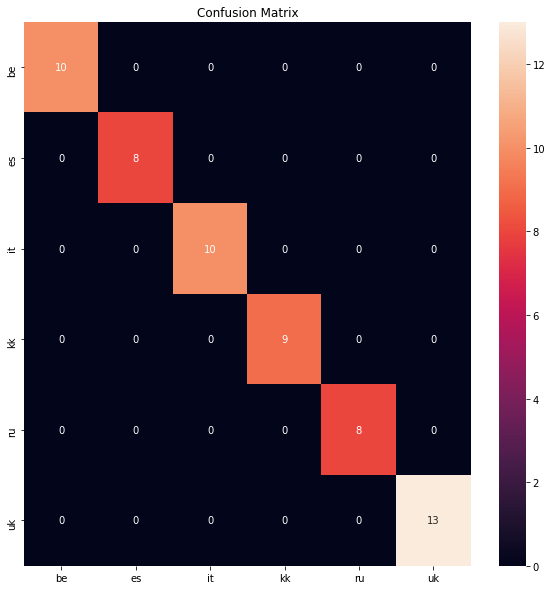

In [34]:
test_classify(y_test, y_predicted, clf.classes_)

              precision    recall  f1-score   support

          be       0.73      0.80      0.76        10
          es       0.58      0.88      0.70         8
          it       0.70      0.70      0.70        10
          kk       0.86      0.67      0.75         9
          ru       0.50      0.88      0.64         8
          uk       0.75      0.23      0.35        13

    accuracy                           0.66        58
   macro avg       0.69      0.69      0.65        58
weighted avg       0.70      0.66      0.63        58



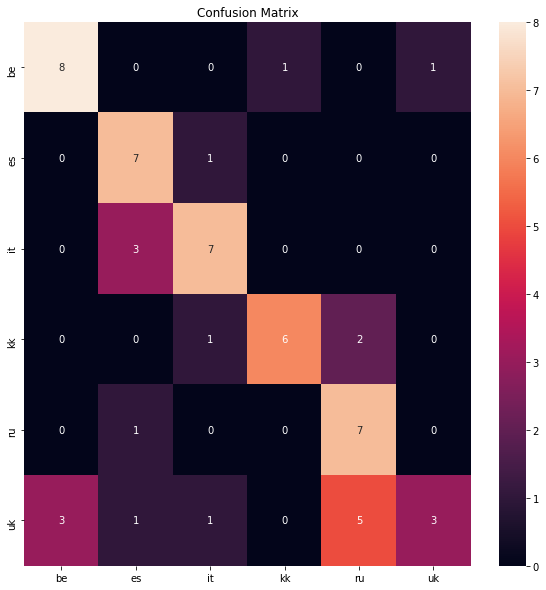

In [35]:
# Проверим на случайных отрывках из тестовых текстов
import random

small_texts = []
for text in X_test:
    begin = random.randint(0, len(text) - 10)
    small_texts.append(text[begin:begin+10])
y_predicted_small = clf.predict(small_texts)
test_classify(y_test, y_predicted_small, clf.classes_)